# ETL

Usaremos las hojas Excel:

'Accesos por Tecnologia' del Excel internet  

'mapa_conectividad' del Excel mapa_conectividad  

'Acc_vel_loc_sinrangos' del Excel internet  

'Penetración-poblacion' del Excel internet

Penetracion-hogares del Excel internet

* Hoja ACCESOS POR TECNOLOGIA del excel internet.xlsx

In [89]:
import pandas as pd

In [90]:
# Importamos la hoja 'ACCESOS POR TECNOLOGIA' del excel internet.xlsx

inter_df = pd.read_excel('internet.xlsx', sheet_name=6)
inter_df.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [91]:
# Informacion estadistica rapida

inter_df.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,1.007000e+03,1.007000e+03,1.007000e+03,1007.000000,1007.000000,1.007000e+03
mean,1.129309e+05,1.821583e+05,4.855699e+04,12542.229394,6497.041708,3.626854e+05
std,2.362922e+05,4.460058e+05,1.758694e+05,20909.412762,11239.855091,7.773137e+05
min,2.230000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,1.978950e+04,1.102050e+04,3.540000e+02,813.000000,334.500000,6.241150e+04
50%,4.396700e+04,4.075000e+04,3.015000e+03,5224.000000,1920.000000,1.139150e+05
75%,8.722000e+04,7.678350e+04,2.925700e+04,14367.500000,7548.000000,1.956520e+05
max,1.586343e+06,2.797700e+06,1.849476e+06,138638.000000,73415.000000,5.011620e+06


In [92]:
# Observamos lo valores unicos de la columna Provincia

inter_df.Provincia.unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán',
       nan], dtype=object)

In [93]:
# Observamos lo valores unicos de la columna Trimestre

inter_df.Trimestre.unique()

array([2, 1, 4, 3, '3 *', '2 *', '1 *', nan,
       'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

In [94]:
# Observamos lo valores unicos de la columna Año

inter_df.Año.unique()

array([2024, 2023, 2022, 2021, 2020, 2019, '2019 *', 2018, 2017, 2016,
       2015, 2014, nan, '*'], dtype=object)

In [95]:
# Observamos el tamaño del dataset

inter_df.shape

(1009, 9)

In [96]:
# Observamos los tipos de datos

inter_df.dtypes 

Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

In [97]:
# Observamos si existen valores nulos

inter_df.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [98]:
# Eliminamos datos faltantes

inter_df.dropna(inplace=True)

In [99]:
inter_df[inter_df.duplicated()==True]

# No existen filas duplicadas

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total


Existen valores que no estan correctamente representados con en la columna 'Año' y 'Trimestre' y deben de ser corridos

In [100]:
# Creamos una pequeña funcion que eliminara esos valores que no sean numeros

def extract(valor, n=4):
    try:
        if len(valor) > 4:
            valor = valor[:n]
            return valor
        else:
            valor = valor[:n-3]
            return valor
    except:
        return valor
        
        

In [101]:
# Aplicamos la funcion extract a cada fila del dataset y posteriomente convertimos los valores de las columnas 'Año' y 'Trimestre' en valores numericos de tipo Int

inter_df['Año'] = inter_df['Año'].apply(extract)
inter_df['Trimestre'] = inter_df['Trimestre'].apply(extract).apply(pd.to_numeric, errors='coerce', downcast='signed')
inter_df['Año'] = inter_df['Año'].apply(pd.to_numeric, errors='coerce', downcast='signed')
inter_df.dtypes

Año               int64
Trimestre         int64
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

* HOJA mapa_conectividad.xlsx

In [102]:
# Leemos el Excel 'mapa_conectividad.xlsx'

poblacion = pd.read_excel('mapa_conectividad.xlsx')
poblacion.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,--,SI,SI,SI,SI,SI,6854100.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,--,--,--,--,--,--,SI,--,--,6854010.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,SI,--,--,--,SI,--,--,SI,--,6854020.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,SI,--,--,--,--,--,SI,--,--,6854030.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,--,--,--,--,--,SI,--,--,--,6854040.0,-35.164397,-60.081358


In [103]:
poblacion.describe()

,Población,Link,Latitud,Longitud
count,4.305000e+03,4.293000e+03,4305.000000,4305.000000
mean,8.707207e+03,3.908916e+07,-32.263116,-63.039292
std,3.824490e+04,2.939911e+07,5.001839,3.829679
min,0.000000e+00,2.000010e+06,-77.874009,-72.891627
25%,1.170000e+02,1.009104e+07,-34.708542,-65.686443
50%,5.790000e+02,3.400705e+07,-32.286202,-63.450636
75%,3.217000e+03,6.612603e+07,-28.583403,-60.009923
max,1.317298e+06,9.401402e+07,-21.817293,-34.626560


In [104]:
# Tamaño del dataset

poblacion.shape 

(4305, 16)

In [105]:
# Observamos el tipo de dato de cada columna

poblacion.dtypes

Provincia          object
Partido            object
Localidad          object
Población           int64
ADSL               object
Cablemódem         object
Dial Up            object
Fibra óptica       object
Satelital          object
Wireless           object
Telefonía Fija     object
3G                 object
4G                 object
Link              float64
Latitud           float64
Longitud          float64
dtype: object

In [106]:
# Observamos lo valores unicos de la columna Provincia

poblacion.Provincia.unique()

array(['BUENOS AIRES', 'SAN LUIS', 'CABA', 'CORDOBA', 'LA PAMPA',
       'RIO NEGRO', 'SANTA FE', 'TIERRA DEL FUEGO', 'TUCUMAN', 'CHUBUT',
       'JUJUY', 'LA RIOJA', 'SANTA CRUZ', 'CATAMARCA', 'CHACO',
       'CORRIENTES', 'MENDOZA', 'SALTA', 'ENTRE RIOS',
       'SANTIAGO DEL ESTERO', 'MISIONES', 'FORMOSA', 'SAN JUAN',
       'NEUQUEN'], dtype=object)

In [107]:
# Observamos si existen valores nulos

poblacion.isnull().sum()

Provincia          0
Partido            0
Localidad          0
Población          0
ADSL               0
Cablemódem         0
Dial Up            0
Fibra óptica       0
Satelital          0
Wireless           0
Telefonía Fija     0
3G                 0
4G                 0
Link              12
Latitud            0
Longitud           0
dtype: int64

In [108]:
# Observamos los datos faltantes

poblacion[poblacion.Link.isnull() ==  True]

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
2751,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Belgrano Ii,0,--,--,--,--,--,--,--,--,--,NaN,-77.874009,-34.626560
2752,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Brown,0,--,--,--,--,--,--,--,--,--,NaN,-64.895348,-62.870538
2753,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Carlini,0,--,--,--,--,--,--,--,--,--,NaN,-62.238369,-58.667544
2754,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Esperanza,0,--,--,--,--,--,--,--,SI,SI,NaN,-63.397393,-56.997322
2755,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Marambio,0,--,--,--,--,--,--,--,SI,SI,NaN,-64.240614,-56.625096
2756,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Matienzo,0,--,--,--,--,--,--,--,--,--,NaN,-64.975862,-60.070679
2757,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Orcadas,0,--,--,--,--,--,--,--,--,--,NaN,-60.737817,-44.737660
2758,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base San Martin,0,--,--,--,--,--,--,--,--,--,NaN,-68.130070,-67.101330
2759,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Camara,0,--,--,--,--,--,--,--,--,--,NaN,-62.594350,-59.919054
2760,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Decepcion,0,--,--,--,--,--,--,--,--,--,NaN,-62.975332,-60.698223


In [109]:
# Eliminamos los datos faltantes porque carecen tambien de otros datos importantes como cantidad de poblacion

poblacion.dropna(inplace=True)

In [110]:
poblacion[poblacion.duplicated()==True]

# No existen valores duplicados

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud


* Hoja Acc_vel_loc_sinrangos del excel internet.xlsx

In [111]:
# Leemos la hoja del Excel 'Acc_vel_loc_sinrangos.xlsx'

inter_df_vl = pd.read_excel('internet.xlsx', sheet_name=0)
inter_df_vl.head()

,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


In [112]:
# Corregimos el nombre de las columnas

inter_df_vl = inter_df_vl.rename(columns={
    'Partido':'Provincia',
    'Localidad':'Partido',
    'link Indec':'Localidad',
    'Velocidad (Mbps)':'link Indec',
    'Provincia':'Velocidad (Mbps)'

})

inter_df_vl.head(5)

,Provincia,Partido,Localidad,link Indec,Velocidad (Mbps),Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


In [113]:
# Tamaño del dataset

inter_df_vl.shape

(18864, 6)

In [114]:
# Observamos lo valores unicos de la columna Provincia

inter_df_vl.Provincia.unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [115]:
inter_df_vl.describe()

,Velocidad (Mbps),Accesos
count,18864.000000,18857.000000
mean,66.866042,612.828499
std,178.987138,6283.359677
min,0.000000,-5582.000000
25%,3.000000,3.000000
50%,10.000000,26.000000
75%,30.000000,180.000000
max,1024.000000,576789.000000


In [116]:
# Observamos el tipo de dato de cada columna

inter_df_vl.dtypes

Provincia            object
Partido              object
Localidad            object
link Indec           object
Velocidad (Mbps)    float64
Accesos             float64
dtype: object

In [117]:
# Observamos si existe valores faltantes

inter_df_vl.isnull().sum()

Provincia           0
Partido             0
Localidad           1
link Indec          0
Velocidad (Mbps)    0
Accesos             7
dtype: int64

In [118]:
inter_df_vl[inter_df_vl.Accesos.isnull()==True]

,Provincia,Partido,Localidad,link Indec,Velocidad (Mbps),Accesos
10510,CORRIENTES,Ituzaingó,Colonia Liebig's,18084010,0.0,NaN
11288,ENTRE RIOS,Tala,Rosario del Tala,30091100,0.0,NaN
14784,SALTA,Cafayate,Tolombón,66021020,0.0,NaN
15288,SALTA,San Carlos,Animaná,66154020,0.0,NaN
15294,SALTA,San Carlos,San Carlos,66154040,0.0,NaN
17235,SANTA FE,Rosario,General Lagos,82084150,0.0,NaN
18090,SANTIAGO DEL ESTERO,Choya,Frías,86063040,0.0,NaN


In [119]:
# Eliminaos los valores faltantes

inter_df_vl.dropna(inplace=True)

In [120]:
inter_df_vl[inter_df_vl.duplicated()==True]

# No posee valores duplicados

,Provincia,Partido,Localidad,link Indec,Velocidad (Mbps),Accesos


* Hoja Penetracion-poblacion del excel internet.xlsx

In [121]:
# Leemos la hoja del Excel 'Penetracion-poblacion.xlsx'

accesos_hab=pd.read_excel('Internet.xlsx', sheet_name=7)
accesos_hab.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [122]:
# Observamos lo valores unicos de la columna Año


accesos_hab.Año.unique() 

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

In [123]:
# Observamos lo valores unicos de la columna Trimestre

accesos_hab.Trimestre.unique()

array([2, 1, 4, 3])

In [124]:
# Observamos lo valores unicos de la columna Provincia

accesos_hab.Provincia.unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [125]:
accesos_hab.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,1000.000000,1000.000000,1000.000000
mean,2018.800000,2.464000,15.727248
std,3.021445,1.114426,9.240063
min,2014.000000,1.000000,2.723000
25%,2016.000000,1.000000,9.018188
50%,2019.000000,2.000000,13.674812
75%,2021.000000,3.000000,20.323973
max,2024.000000,4.000000,52.236739


In [126]:
accesos_hab.isnull().sum()

#No existen valores nulos

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [127]:
accesos_hab[accesos_hab.duplicated()==True]

#No existen valores duplicados

,Año,Trimestre,Provincia,Accesos por cada 100 hab


In [128]:
# Nos aseguramos que pandas considere solo 2 decimales en los datos de la columna "Accesos por cada 100 hab"

accesos_hab["Accesos por cada 100 hab"]=accesos_hab["Accesos por cada 100 hab"].round(2)

* Hoja Penetracion-hogar del excel internet.xlsx

In [129]:
# Leemos la hoja del Excel 'Penetracion-hogares.xlsx'

accesos_hog=pd.read_excel('Internet.xlsx', sheet_name=8)
accesos_hog.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [130]:
accesos_hog.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,1000.000000,1000.000000,1000.000000
mean,2018.800000,2.464000,52.794973
std,3.021445,1.114426,24.135063
min,2014.000000,1.000000,9.513970
25%,2016.000000,1.000000,33.957657
50%,2019.000000,2.000000,50.133004
75%,2021.000000,3.000000,67.010861
max,2024.000000,4.000000,124.061394


In [131]:
# Observamos lo valores unicos de la columna Año

accesos_hog.Año.unique() 

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

In [132]:
# Observamos lo valores unicos de la columna Trimestre

accesos_hog.Trimestre.unique()

array([2, 1, 4, 3])

In [133]:
# Observamos lo valores unicos de la columna Provincia

accesos_hog.Provincia.unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [134]:
accesos_hog.isnull().sum()

#No existen valores nulos

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [135]:
accesos_hog[accesos_hog.duplicated()==True]

#No existen valores duplicados

,Año,Trimestre,Provincia,Accesos por cada 100 hogares


In [64]:

# Nos aseguramos que pandas considere solo 2 decimales en los datos de la columna "Accesos por cada 100 hogares"

accesos_hog["Accesos por cada 100 hogares"]=accesos_hog["Accesos por cada 100 hogares"].round(2)

# EDA

#### MATRIZ DE CORRELACION

Una matriz de correlacion nos ayudara para poder observar si existe alguna relacion entre columnas en el dataframe 'ACCESOS POR TECNOLOGIA'

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
corr=inter_df.iloc[:, [0,1,3,4,5,6,7]].corr()

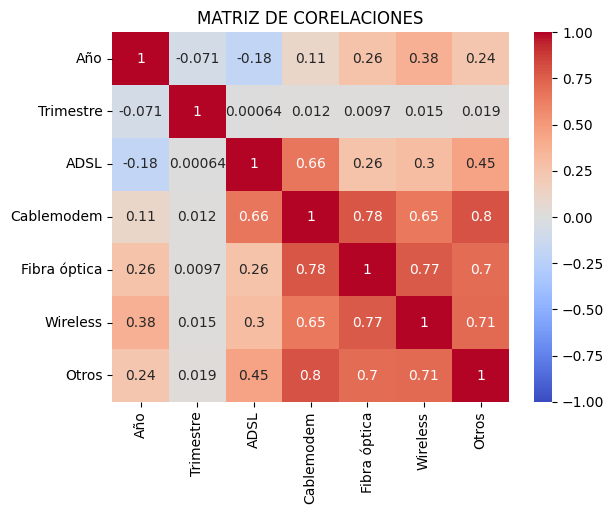

In [ ]:
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('MATRIZ DE CORELACIONES')
plt.show()

Observamos que la unica tecnologia que parece no tener mucha relacion con las demas es 'ADSL' 

## Analisis sobre el Total de Accesos en el Pais de Argentina

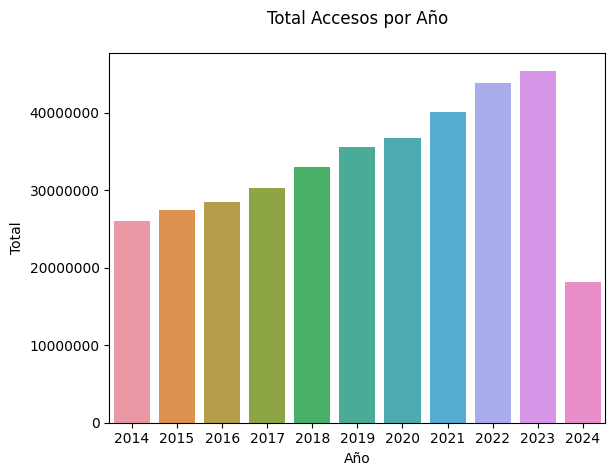

In [177]:
# Distribuiremos los datos por la columna 'Año' con respecto a la columna 'Total'


sns.barplot(inter_df, x='Año', y='Total', errorbar=None, estimator="sum")
plt.title('Total Accesos por Año\n')
plt.ticklabel_format(style='plain', axis='y')  # Eje Y en formato plano
plt.show()

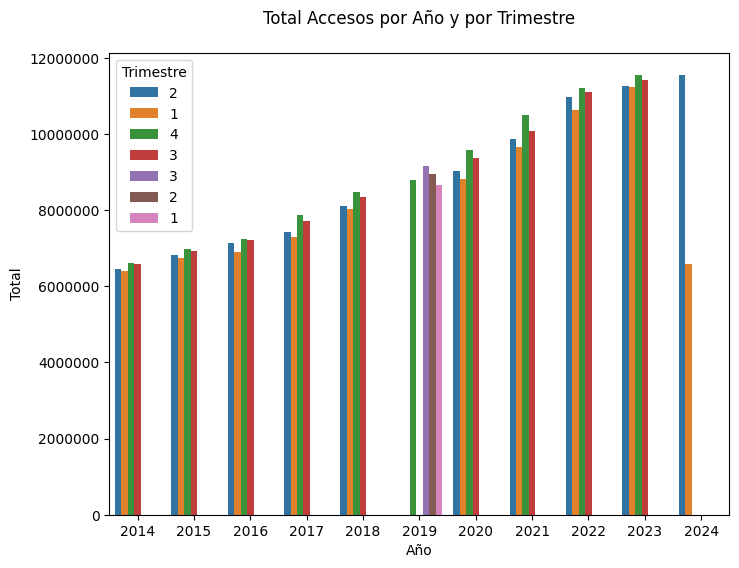

In [178]:
# Distribuiremos los datos por la columna 'Año' con respecto a la columna 'Total'

plt.figure(figsize=(8,6))
sns.barplot(inter_df, x='Año', y='Total', hue='Trimestre', estimator= "sum", errorbar=None)
plt.ticklabel_format(style='plain', axis='y', )  # Eje Y en formato plano
plt.title('Total Accesos por Año y por Trimestre\n')
plt.show()

Observamos que la barra del año 2024 no sigue la tendencia como si lo hacen los años anteriores, esto se debe a que los datos del 2024 concluyen apenas hasta el 2do trimestre del año, como lo podemos ver claramente en la segunda grafica agrupada por trimestres.


### Conclusiones

A lo largo de los años, la cantidad de accesos a ido incrementando manteniendo una tendencia alcista.

## Analizaremos como esta distribuida la cantidad de habitantes con respecto a la ciudad de Buenos Aires y las demas provincias de Argentina

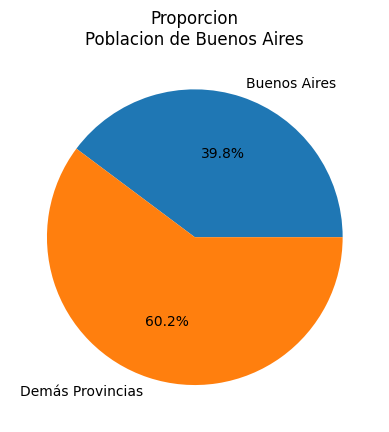

In [179]:
#Graficaremos el porcentaje de Habitantes de Buenos Aires frente al Total de Habitantes en Argentina

plt.pie([poblacion[poblacion.Provincia=='BUENOS AIRES'].Población.sum(), poblacion[poblacion.Provincia!='BUENOS AIRES'].Población.sum()], autopct = "%0.1f%%", labels=['Buenos Aires', 'Demás Provincias'])
plt.title("Proporcion\nPoblacion de Buenos Aires")
plt.show()

### Conclusiones

Concluimos que la provincia de Buenos Aires concentra cerca de un 40% de la poblacion total de Argentina

## Analisis sobre las tecnologias predonominantes en el Pais de Argentina

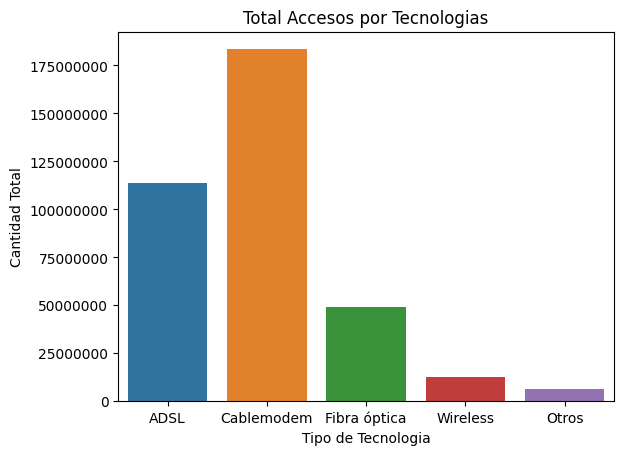

In [180]:

sns.barplot(data = inter_df.iloc[:, [3,4,5,6,7]], estimator="sum", errorbar=None)
plt.title('Total Accesos por Tecnologias')
plt.xlabel('Tipo de Tecnologia')
plt.ylabel('Cantidad Total')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Observamos que las tecnologias predominantes son Cablemodem y ADSL, mientras que la tecnologia de Fibra Obtica es una tecnologia emergente

### Observaremos 5 graficas de barras:

1ra: Con respecto al total por cada provincia

2da: Con respecto al Fibra optica por cada provincia

3ra: Con respecto al ADSL por cada provincia

4ta: Con respecto al Wireless por cada provincia

5ta: Con respecto a Otros por cada provincia

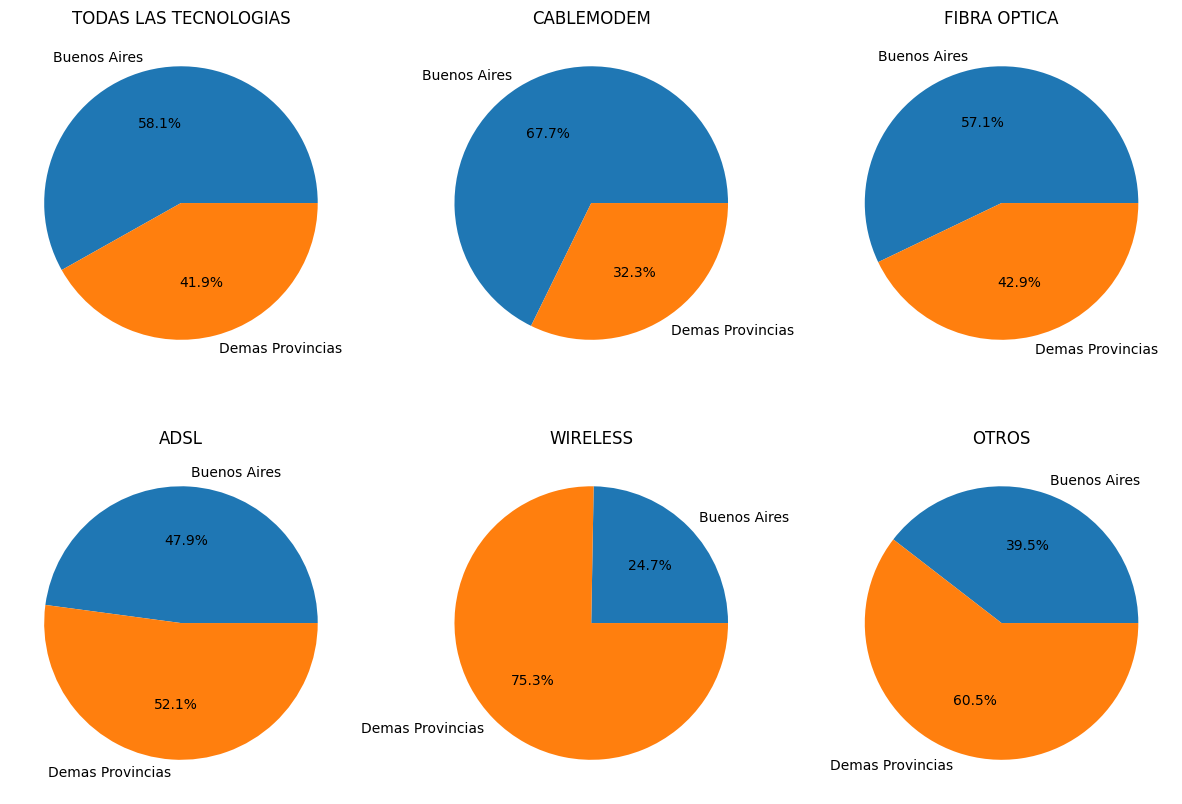

In [181]:
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.pie([inter_df.query("Provincia=='Buenos Aires' or Provincia=='Capital Federal'").Total.sum(), inter_df.query("Provincia!='Buenos Aires' and Provincia!='Capital Federal'").Total.sum()], autopct = "%0.1f%%", labels=['Buenos Aires', 'Demas Provincias'])
plt.title("TODAS LAS TECNOLOGIAS")

plt.subplot(2, 3, 2)
plt.pie([inter_df.query("Provincia=='Buenos Aires' or Provincia=='Capital Federal'").Cablemodem.sum(), inter_df.query("Provincia!='Buenos Aires' and Provincia!='Capital Federal'").Cablemodem.sum()], autopct = "%0.1f%%", labels=['Buenos Aires', 'Demas Provincias'])
plt.title("CABLEMODEM")

plt.subplot(2, 3, 3)
plt.pie([inter_df.query("Provincia=='Buenos Aires' or Provincia=='Capital Federal'")['Fibra óptica'].sum(), inter_df.query("Provincia!='Buenos Aires' and Provincia!='Capital Federal'")['Fibra óptica'].sum()], autopct = "%0.1f%%", labels=['Buenos Aires', 'Demas Provincias'])
plt.title("FIBRA OPTICA")

plt.subplot(2, 3, 4)
plt.pie([inter_df.query("Provincia=='Buenos Aires' or Provincia=='Capital Federal'")['ADSL'].sum(), inter_df.query("Provincia!='Buenos Aires' and Provincia!='Capital Federal'")['ADSL'].sum()], autopct = "%0.1f%%", labels=['Buenos Aires', 'Demas Provincias'])
plt.title("ADSL")

plt.subplot(2, 3, 5)
plt.pie([inter_df.query("Provincia=='Buenos Aires' or Provincia=='Capital Federal'")['Wireless'].sum(), inter_df.query("Provincia!='Buenos Aires' and Provincia!='Capital Federal'")['Wireless'].sum()], autopct = "%0.1f%%", labels=['Buenos Aires', 'Demas Provincias'])
plt.title("WIRELESS")

plt.subplot(2, 3, 6)
plt.pie([inter_df.query("Provincia=='Buenos Aires' or Provincia=='Capital Federal'")['Otros'].sum(), inter_df.query("Provincia!='Buenos Aires' and Provincia!='Capital Federal'")['Otros'].sum()], autopct = "%0.1f%%", labels=['Buenos Aires', 'Demas Provincias'])
plt.title("OTROS")
plt.show()

GRAFICA 1: Observamos que las compañias poseen el 58% de sus tecnologias de servicios de internet (todas las tecnologias) a travez de accesos en el territorio de Buenos Aires (Incluyendo Capital Federal) y el restante esta distribuido en las demas provincias.

GRAFICA 2: Si solo hacemos un analisis con el servicio CABLEMODEM como servicio relativamente moderno, observamos que las demas provincias de manera general tampoco poseen una gran distribucion de este servicio comparado con las ciudades de Buenos Aires y Capital Federal

GRAFICA 3: De forma similar sucede con la tecnologia mas actual como el servicio de internet por FIBRA OPTICA

GRAFICA 4: Pero al hacer los analisis con el servicio de ADSL, observamos que estas provincias empiezan a tener una mayor presencia de esta tecnologia en sus territorios.

GRAFICA 5: Con la tecnologia de WIRELESS, las demas provincias alcanzaron un 75% frente a la ciudad de Buenos Aires.

GRAFICA 6: Algo similar paso con las OTRAS tecnologias, teniendo mayor distribucion de estas en dichas provincias.

### Conclusiones:

Podemos concluir que las demas provincias de Argentina cuentan con una menor inversion de infraestructura con respecto a nuevas tecnologias, tecnologias como la 'Cablemodem' y 'Fibra Optica' son las menos predominantes, mientras que tecnologias como 'ADSL', 'Wireless' u 'Otros' (hibridos entre ADSL y Fibra Optica, internet inalambrico, internet satelital u otro tipo de tecnologias) son las que más estan distribuidas en sus territorios.

## ANALIZAREMOS LA EVOLUCION DE LAS TECNOLOGIAS DEL INTERNET

Como el año 2024 posee tan solo 2 trimestres en este dataset, filtraremos todos los años solo por el 1er y 2do trimestre para hacer una analisis más equilibrado de como va evolucionando las tecnologias de los servicios de internet

Text(0, 0.5, 'Cantidad')

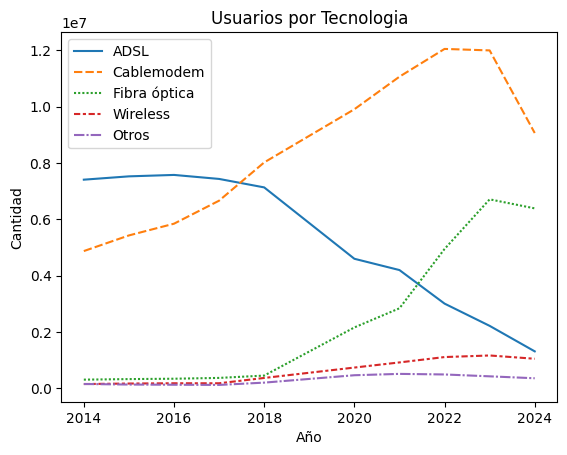

In [182]:

sns.lineplot(data = inter_df.query("Trimestre == 1 or Trimestre == 2").iloc[:, [0,3,4,5,6,7]].groupby(['Año']).sum())
plt.title('Usuarios por Tecnologia')
plt.ylabel('Cantidad')

Las tecnologías como fibra óptica y cable módem han tomado protagonismo en los últimos años, siendo la fibra óptica la que parece marcar una tendencia vanguardista. Sin embargo, se observa una ligera caída en la tendencia general durante los primeros trimestres del año, tanto en la adopción de fibra óptica como de cable módem. Esto podría atribuirse a la inestabilidad política y económica registrada a principios de año en dicho país. Por otro lado, las tecnologías como ADSL presentan una disminución significativa en la cantidad de usuarios a lo largo de los años, lo que indica que cada vez menos personas las utilizan.

Asimismo, es evidente que las tecnologías como wireless y otras tecnologías se han mantenido constantes a lo largo del tiempo, lo que demuestra su importancia en condiciones donde generalmente hay pocas facilidades para instalar nuevas infraestructuras de internet cableado.

### Conclusiones

En la actualidad, las tecnologías más predominantes son el cable módem y la fibra óptica, destacando esta última por su superioridad. Mientras tanto, tecnologías como wireless y similares se mantienen relevantes gracias a su utilidad en áreas con poca cobertura de cableado. Por el contrario, el ADSL es una tecnología que cada vez más está siendo abandonada por los usuarios.

#### ANALIZAREMOS QUE VELOCIDADES PROMEDIO DE INTERNET ESTAN ALCANZANDO LAS PROVINCIAS DE ARGENTINA

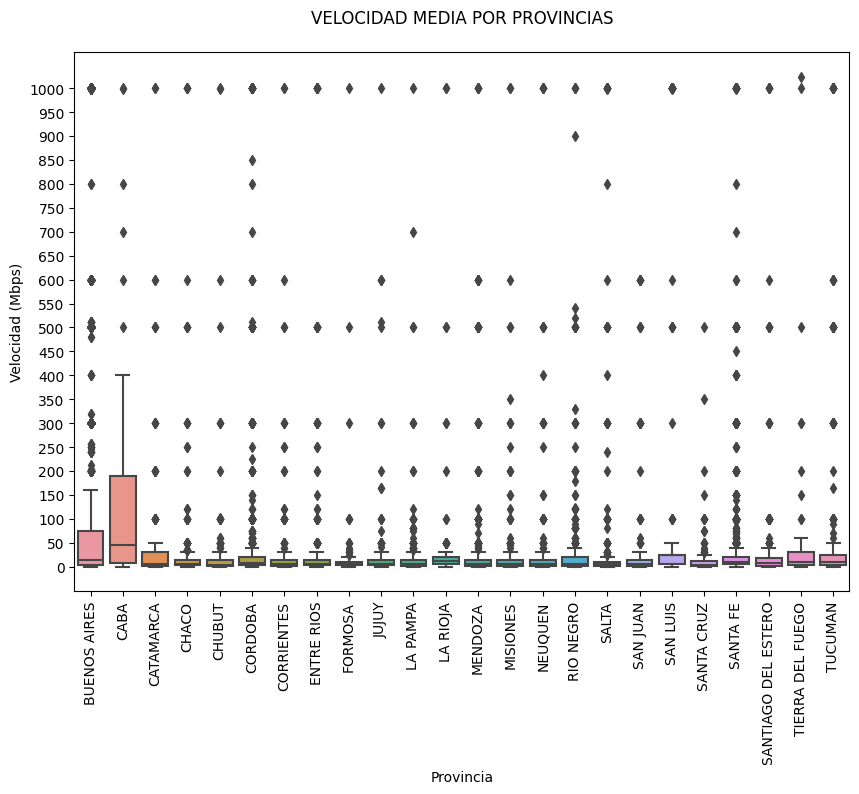

In [183]:
plt.figure(figsize=(10,7))
sns.boxplot(data=inter_df_vl, y='Velocidad (Mbps)', x='Provincia')
plt.title("VELOCIDAD MEDIA POR PROVINCIAS\n")
plt.xticks(rotation=90)
plt.yticks(range(0, 1050, 50))
plt.show()

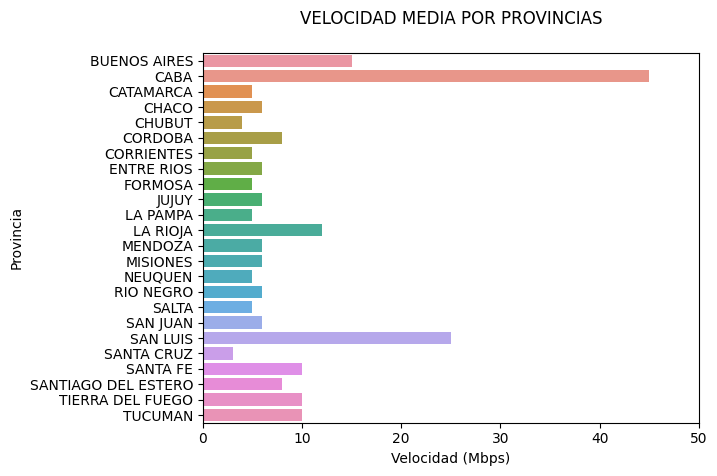

In [184]:
sns.barplot(data=inter_df_vl, x='Velocidad (Mbps)', y='Provincia', estimator=np.median, errorbar=None)
plt.xlim(0, 50)
plt.title("VELOCIDAD MEDIA POR PROVINCIAS\n")
plt.show()

De los gráficos podemos observar que las ciudades que más destacan en cuanto a la velocidad de internet son Buenos Aires, San Luis y CABA. Estas ciudades, por lo general, cuentan con velocidades que oscilan entre los 10 Mbps y 50 Mbps, pero tambien existe mucho porcentaje de esa poblacion que supera este rango.

Por otro lado, las demás provincias presentan una distribución de opciones bastante uniforme entre sí, con velocidades más comunes que varían entre los 5 Mbps y 20 Mbps. Aunque existen casos donde las velocidades superan este margen, que podrian representan menos del 25% de ellas.

### Conclusiones:

Los territorios de Buenos Aires, San Luis y CABA son los que disfrutan de mejores velocidades de internet, con una media que va entre 10 Mbps y 50 Mbps. En contraste, las demás provincias alcanzan velocidades que generalmente oscilan entre los 10 Mbps y 20 Mbps.

## Analizaremos la penetracion de internet por hogares y habitantes

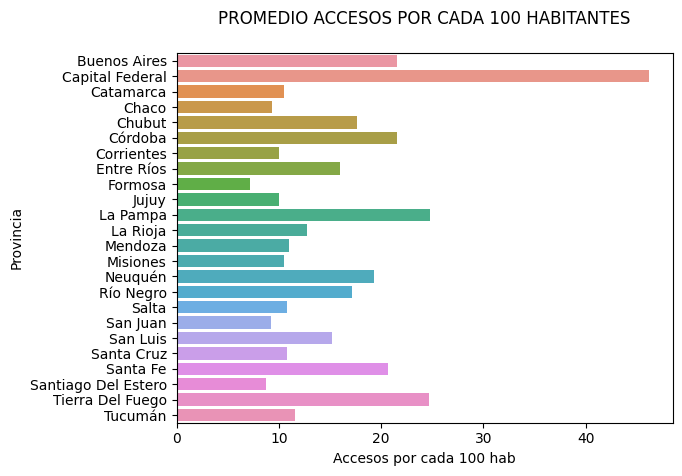

In [185]:
sns.barplot(data=accesos_hab, x='Accesos por cada 100 hab', y='Provincia',  errorbar=None)
plt.title("PROMEDIO ACCESOS POR CADA 100 HABITANTES\n")
plt.show()

Existen muchas provincias que tiene un promedio por debajo del 30% de habitantes que poseen conexion a internet

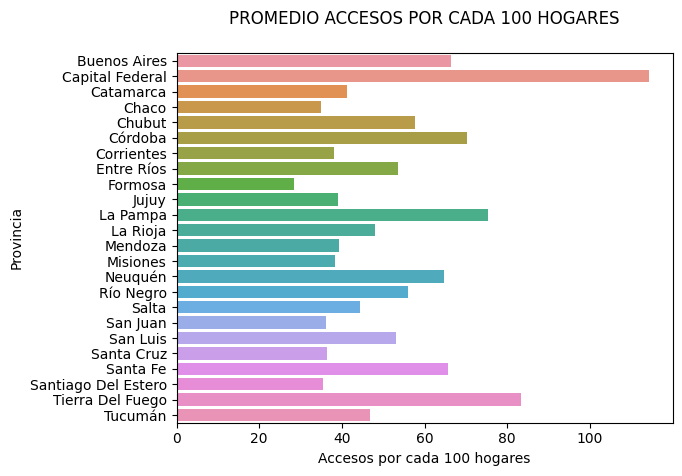

In [186]:
sns.barplot(data=accesos_hog, x='Accesos por cada 100 hogares', y='Provincia', errorbar=None)
plt.title("PROMEDIO ACCESOS POR CADA 100 HOGARES\n")
plt.show()

Existen algunas provincias que tiene un promedio del 40% de hogares que poseen conexion a internet